# Project Ladds - a lab for the Datadriven Society
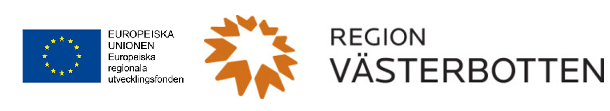


This notebook gives some examples on how to access (open) data from a CKAN-instance. It also shows some examples of basic tinkering with the data and finally gives an example on a basic visualization.

### This example and the technical environment is an Alfa-version. Your advice, code or comments are welcome. Send an email to thomas.kvist@regionvasterbotten.se.
----

The idea is to give you some examples that can be used and hopefully lower the barrier for creating value from (Open) Data and initiating discussion of what data that should be published as Open Data.

It is early stages and anyone who wants to give me new examples or a revised version of the published example(s) are welcome to do so. You can mail me at thomas.kvist@regionvasterbotten. Comments and tips regarding examples, the lab environment ar also welcome to do so.

Unfortunately, I will not be able to provide much support if you run into CKAN, Python or Jupyter related trouble. 

### Important note: Individual notebooks is not backuped right now. To be sure that your notebooks is preserved, please copy your personal Jupyter notebook to your own computer/storage unit to prevent irreversible loss if the lab environment breaks down.###

# Example 1: When should people sensitive for particles avoid Umeå city centre?

This example shows you how to:

Get Open Data from CKAN. CKAN is a common software for Open Data portals.
Sum up the levels of PM10 (particles)and create sums, we create a "day of week"-field and sum up the readings using this field.  
Visualize the result in a diagram
    
Ugly code? Are you a better coder? Probably. Please send me your code so this can be replaced. But please be generoous with comments an instructions, enabling beginners to understand what the code does.   

### Fetch data from a CKAN-driven dataportal
CKAN is a very common portal for Open Data. There is API:s for accessing CKAN and the data and metadata that is stored within the CKAN-portal in question. We are using the portal with the adress http://opendata.opennorth.se You can get information about the API on this address. Se http://docs.ckan.org/en/latest/api   

#### Install the API
The API (if not already present) must be installed. Note: This API is installed in the Ladds environment, but you might want to create your own instance of Jupyter in case this information could be of use.

This is how you install the API in Linux from the terminal:

sudo pip3 install ckanapi

You might have to install pip3 if it has not already been installed. This is done usint this command in the terminal:  

sudo apt-get install python3-pip

#### Check out the API
The API has serveral functions. It makes it possible to get metadata about the files in the portal, e.g listing the grouping of the different files. Using the information in the metadata, you can programatically get the lastet version of a file in a dataset, list newly published files in one or several datasets etc. 

In [4]:
'''
Check that the API to CKAN is working
(The API is already avalible in the LADDS-environment)
'''
from ckanapi import *
print ('Start')
# Make a test - list the groups that is used for grouping the datasets
ua = 'ckanapiexample/1.0 (+http://example.com/my/website)'

demo = RemoteCKAN('http://opendata.opennorth.se/', user_agent=ua)
groups = demo.action.group_list(id='data-explorer')

print (groups)
print ('Stop')

Start
['berattarnas-stad', 'employment', 'environment-and-health', 'financial', 'miscellaneous', 'recreation', 'schools']
Stop


#### Check out the metadata for the datasets and files (resources)

CKAN uses dataset as the name for a collection of files containing the same information. The individual files are called resources. Datasets can be grouped into "Groups". You can use the information about the datasets and the resources (files) to get the information you nedd to import/acces the files you need. below is an example on how you can access metadata from CKAN.

In [5]:
'''
List metadata for the datasets and files (resources) that exist in the CKAN-instance
'''
from ckanapi import *


counter_datasets = 0
counter_files = 0

on_list_metadata = []
on_dict_metadata = {}
on_dict_orgdata = {}
on_list_resources = []
on_dict_resources = {}
my_dict = {}

print ('Start')

# List all resources (information) connected to each one of the datasets present on the OpenNorth site
ua = 'ckanapiexample/getallresources (+http://example.com/my/website)'

ckaninst_opennorth = RemoteCKAN('http://opendata.opennorth.se/', user_agent=ua)

on_list_metadata = ckaninst_opennorth.action.current_package_list_with_resources(id='data-explorer')

for row in on_list_metadata:
    counter_datasets += 1
    on_dict_metadata = row
    
    on_dict_orgdata = on_dict_metadata['organization']
    
    ONResourcesList = on_dict_metadata['resources']
    
    print ('--------------------')
    print ('Dataset number:', counter_datasets)
    print ('Title of Dataset:', on_dict_metadata['title'])
    print ('Type of Licence:', on_dict_metadata['license_title'])
    print ('Organization Description:', on_dict_orgdata['description'])

    for row in ONResourcesList:
        on_dict_resources = row
          
        if on_dict_resources['format'] != 'RDF':    # Do not want RDF-files
            print ('---')
            print ('Format:', on_dict_resources['format'])
            print ('URL:', on_dict_resources['url'])
            print ('Description:', on_dict_resources['description'])

print ('Number of datasets:',counter_datasets)
print ('Number of files (files with some formats may be excluded):',files)
print ('Stop')

Start
--------------------
Dataset number: 1
Title of Dataset: Adresses Skelleftea
Type of Licence: Other (Public Domain)
Organization Description: The municipality of Skelleftea. (Skellefteå kommun)    

[Link](http://www.skelleftea.se/psidata) to linked data from Kolada.
---
Format: CSV
URL: https://openumea-storage.s3.amazonaws.com/2016-12-20T15:10:20/Adress_fastigheter.csv
Description: 
--------------------
Dataset number: 2
Title of Dataset: School menu
Type of Licence: Other (Public Domain)
Organization Description: The municipality of Skelleftea. (Skellefteå kommun)    

[Link](http://www.skelleftea.se/psidata) to linked data from Kolada.
---
Format: CSV
URL: https://openumea-storage.s3.amazonaws.com/2016-06-23T14:24:56.709Z/school-menu.csv
Description: 
--------------------
Dataset number: 3
Title of Dataset: Energy/water consumption properties Skelleftea
Type of Licence: Other (Public Domain)
Organization Description: The municipality of Skelleftea. (Skellefteå kommun)    

[L

URL: https://openumea-storage.s3.amazonaws.com/2017-08-26T08:00:00/Utfallsdata_UME.csv
Description: 
--------------------
Dataset number: 32
Title of Dataset: Recreational Facilities
Type of Licence: Other (Public Domain)
Organization Description: The municipality of Umea (Umeå kommun) 
---
Format: XML
URL: https://openumea-storage.s3.amazonaws.com/2017-09-19T05:10:07/Facilities.xml
Description: 
---
Format: XML
URL: https://openumea-storage.s3.amazonaws.com/2017-09-20T05:10:06/Facilities.xml
Description: 
---
Format: XML
URL: https://openumea-storage.s3.amazonaws.com/2017-09-21T05:10:06/Facilities.xml
Description: 
--------------------
Dataset number: 33
Title of Dataset: Environment
Type of Licence: Other (Public Domain)
Organization Description: The municipality of Umea (Umeå kommun) 
---
Format: CSV
URL: http://ckan.openumea.se/datastore/dump/27fb8bcc-23cb-4e85-b5b4-fde68a8ef93a
Description: Data regarding the air quality in the Municipality of Umea from the city´s sensors.. The le

NameError: name 'files' is not defined

If you already know the name of the dataset and want a list of what files(resources) that are present in that dataset you can run a variant of the script above 

In [ ]:
'''
List metadata for a specific dataset and the files (resources) within the dataset
'''
from ckanapi import *

on_list_metadata = []
on_dict_metadata = {}
on_dict_orgdata = {}
on_list_resources = []
on_dict_resources = {}
my_dict = {}

print ('Start')

# List all resources (information) connected to each one of the datasets present on the OpenNorth site
ua = 'ckanapiexample/getallresources (+http://example.com/my/website)'
ckaninst_opennorth = RemoteCKAN('http://opendata.opennorth.se/', user_agent=ua)

on_list_metadata = ckaninst_opennorth.action.current_package_list_with_resources(id='data-explorer')

for row in on_list_metadata:
    on_dict_metadata = row
    on_dict_orgdata = on_dict_metadata['organization']
    
    on_list_resources = on_dict_metadata['resources']
    
    for row in on_list_resources:
        on_dict_resources = row
        
# Just looking for files in the 'Environment' dataset        
        if on_dict_metadata['title'] == 'Environment':
            print ('---')
            print ('Format:', on_dict_resources['format'])
            print ('URL:', on_dict_resources['url'])
            print ('Description:', on_dict_resources['description'])
            
print ('Stop')

#### Create a locally stored testfile

It is easy to create a copy of the file in a CKAN-instance on your own compyter/file storage. A testfile outside of CKAN is used below. I have used the file containing the airquiality in Umea. I am using the CSV-file and the url listed för that format

In [6]:
'''
Create a testfile stored on your own computer
'''
import csv
import datetime as dt
import urllib.request
import os.path

count_read = 0
count_write = 0

# Location and name of the testfile I want to create and use
file_airquality = '/Users/thkvi/Desktop/airquality_umea_test.csv' # You choose your own path and name

# URL to the file in the CKAN-instance
url = 'http://ckan.openumea.se/datastore/dump/27fb8bcc-23cb-4e85-b5b4-fde68a8ef93a'

print ('Start')

# Delete existing file if you want to create a new testfile
if os.path.isfile(file_airquality) is True:
    os.remove(file_airquality)

# Create a file if it doesn't already exist
if os.path.isfile(file_airquality) is False:
    with open(file_airquality, 'xt') as fout:
        
# Just downloading and creating a new file
        with urllib.request.urlopen(url) as response:
            airquality_data_bytes = response.read()
            airquality_data_string = airquality_data_bytes.decode(encoding='UTF-8')
        
            fout.write(airquality_data_string)
            fout.close()
            print ('Local testfile created')

print('Stop')

Start
Local testfile created
Stop


#### List buckets in S3
You might to get a list of the buckets that exists. If you run the code belowyour whish will become true.  

In [7]:
# Print out bucket names
import boto3

s3 = boto3.resource('s3')

print ('Start')

for bucket in s3.buckets.all():
   print(bucket.name)

print ('Stop')

Start
laddsexamples
umeaenergi
Stop


#### Create a testfile stored in S3

If you want, you can create a testfile in a bucket on Amazons S3. That can be a wise if your files ar large.

In [8]:
'''
Create a testfile stored on S3
'''
import os.path
import urllib.request
import boto3

count_read = 0
count_write = 0

s3 = boto3.resource('s3')

# URL to the file in the CKAN-instance
url_fin = 'http://ckan.openumea.se/datastore/dump/27fb8bcc-23cb-4e85-b5b4-fde68a8ef93a'

# Location and name of the local testfile I want to create and use
file_airquality = '/Users/thkvi/Desktop/airquality_umea_test.csv' # You choose your own path and name

# Location and name of the testfile on S3 I want to create and use. The bucket must be exist before it can be used
my_bucket = 'laddsexamples'
key = 'Example1/airquality_umea_test.csv'

print ('Start')

# Delete existing local testfile if you want to create a new local testfile
if os.path.isfile(file_airquality) is True:
    os.remove(file_airquality)

# Create a local testfile if it doesn't already exist
if os.path.isfile(file_airquality) is True:
    print ('Local testfile already exist')
    quit () 
else:
    with open(file_airquality, 'xt') as airQualityFile:
        
# Downloading from CKAN and creating a new locally stored testfile
        with urllib.request.urlopen(url_fin) as response:
            airQualityFileContentBytes = response.read()
            print ('File downloaded from CKAN')
            airQualityFileContentString = airQualityFileContentBytes.decode(encoding='UTF-8')
        
            airQualityFile.write(airQualityFileContentString)
            airQualityFile.close()
            print ('Locally stored testfile is created')
            
# Upload a locally stored testfile to S3 (by filename)
            s3.Bucket(my_bucket).upload_file('/Users/thkvi/Desktop/airquality_umea_test.csv', key)
            print ('Testfile tranferred to S3')
        
print('Stop')

Start
File downloaded from CKAN
Locally stored testfile is created
Testfile tranferred to S3
Stop


### Add information to the downloaded file 

Create a new "day of week"-field using the existing datefield. Setting 1 for Monday, 2 for Tuesday etc. Some fields we are uninterested are discarded. The result is written in a new file. 

In [2]:
'''
Create a new "day of week"-field using the existing datefield. Setting 1 for Monday, 2 
for Tuesday etc. Some fields we are uninterested in is discarded. The result is written in a new file.
'''
import csv
import datetime as dt
import urllib.request
import os.path
import boto3
import botocore

count_read = 0
count_write = 0

s3 = boto3.resource('s3')

# Location and name of the testfile on S3 I want to use. 
my_bucket = 'laddsexamples'
key = 'Example1/airquality_umea_test.csv'

fin_airquality_path = '/Users/thkvi/Desktop/airquality_umea_test.csv' # You choose your own path and name
fout_airquality_path = '/Users/thkvi/Desktop/airquality_umea_test_revised.csv' # You choose your own path and name

list_air_quality = []

print ('Start')

# Delete existing local version of infile if you want to create a new local  testfile
if os.path.isfile(fin_airquality_path) is True:
    os.remove(fin_airquality_path)
        
if os.path.isfile(fin_airquality_path) is True:
    print ('Local file already exists')
    quit()
else:
    
# Download file from S3 and store it locally (if the file does not already exist locally)
    s3.meta.client.download_file(my_bucket, 'Example1/airquality_umea_test.csv', fin_airquality_path)

    with open(fin_airquality_path, 'r', encoding='utf-8') as fin_airquality:
        datareader_fin_airquality = csv.reader(fin_airquality, delimiter=',')
    
# Moving the infile into a list
        for row in datareader_fin_airquality:
            count_read += 1
            list_air_quality.append(row)
            
# Delete existing revised outfile if you want to create a new revised testfile            
        if os.path.isfile(fout_airquality_path) is True:
            os.remove(fout_airquality_path)

# Create a outfile if it doesn't already exist
        if os.path.isfile(fout_airquality_path) is False:
        
            with open (fout_airquality_path, 'w') as fout_airquality:
                datawriter_fout_airquality = csv.writer(fout_airquality, delimiter=',')
    
# Writing the data
                for row in list_air_quality:

# Writing a row with field names
                    if count_write == 0:
                        lineout = ['Date', 'Time', 'Weekday', 'Level_PM10']
                    else:
# Creating av file with date, time, weekday and level of PM10
                        mdatetime = row[6]
                        mdate = mdatetime[0:10]
                        mtime = mdatetime[11:16]
                        mdateindateformat = dt.datetime.strptime(mdate,"%Y-%m-%d")
                        mweekday = dt.date.isoweekday(mdateindateformat)
            
                        lineout = [mdate, mtime, str(mweekday), row[10]]   
            
                    datawriter_fout_airquality.writerow(lineout)
                    count_write += 1
        else:
            print ('Revised file (output) already exist')
        
print ('Rows read:', count_read)
print ('Rows written:', count_write)       
print ('Stop') 

Start
Rows read: 93085
Rows written: 93085
Stop


### Summing up the levels of particles (PM10) on each weekday to see if some day has more pollution than others. Also creating a very basic visualization

Start
Statistics
Rows read: 93085
Sum of PM10 readings on Mondays: 180433
Sum of PM10 readings on Tuesdays: 187591
Sum of PM10 readings on Wednesdays: 591244
Sum of PM10 readings on Thursdays: 197287
Sum of PM10 readings on Fridays: 177454
Sum of PM10 readings on Saturdays: 123747
Sum of PM10 readings on Sundays: 127193


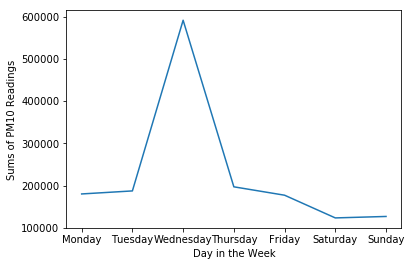

Stop


In [3]:
'''
Summing up the levels of particles (PM10) on each weekday to see if some day 
has more pollution than others. Also creating a very basic visualization
'''

import csv
import matplotlib.pyplot as plt
import numpy as np

count_read = 0
count_write = 0

fin_airquality_revised_path = '/Users/thkvi/Desktop/airquality_umea_test_revised.csv' # You choose your own path and name

sums =[]
days = [1,2,3,4,5,6,7]

sum_monday = 0
sum_tuesday = 0
sum_wednesday = 0
sum_thursday = 0
sum_friday = 0
sum_saturday = 0
sum_sunday = 0

print ('Start')

with open (fin_airquality_revised_path) as fin_airquality_revised:
    datareader_fin_airquality_revised = csv.reader(fin_airquality_revised, delimiter=',')
    
    for row in datareader_fin_airquality_revised:
        count_read += 1
        if count_read > 1:
            int_weekday = int(row[2])
            int_levelPM10 = int(row[3])
            if int_weekday == 1:
                sum_monday += int_levelPM10
            elif int_weekday == 2:
                sum_tuesday += int_levelPM10
            elif int_weekday == 3:
                sum_wednesday += int_levelPM10
            elif int_weekday == 4: 
                sum_thursday += int_levelPM10
            elif int_weekday == 5: 
                sum_friday += int_levelPM10
            elif int_weekday == 6: 
                sum_saturday += int_levelPM10
            elif int_weekday == 7: 
                sum_sunday += int_levelPM10
            else:
                print ('error in daynumber:',row[2])
        else:
            pass
        
    sums.append(int(sum_monday))
    sums.append(int(sum_tuesday))
    sums.append(int(sum_wednesday))
    sums.append(int(sum_thursday))
    sums.append(int(sum_friday))
    sums.append(int(sum_saturday))
    sums.append(int(sum_sunday))
    
print('Statistics')
print ('Rows read:', count_read)
                                                  
print ('Sum of PM10 readings on Mondays:', sum_monday)
print ('Sum of PM10 readings on Tuesdays:', sum_tuesday)
print ('Sum of PM10 readings on Wednesdays:', sum_wednesday)
print ('Sum of PM10 readings on Thursdays:', sum_thursday)
print ('Sum of PM10 readings on Fridays:', sum_friday)
print ('Sum of PM10 readings on Saturdays:', sum_saturday)
print ('Sum of PM10 readings on Sundays:', sum_sunday)

#days = np.arange(days)
plt.plot(days,sums)

plt.xlabel('Day in the Week')
plt.ylabel('Sums of PM10 Readings')
my_xticks = ['Monday', 'Tuesday', 'Wednesday','Thursday', 'Friday', 'Saturday', 'Sunday']
plt.xticks (days, my_xticks)
plt.grid=('True')
plt.show()

print ('Stop')


Now you can see how much particles in total that has been measured by the city of Umea, summed on each weekday. If te result are surprising, the cause is perhaps related to te dataquality. That can be explored using different statistical methods and vizualisations. Perhaps something that you want to test?  